In [1]:
import pickle
import numpy as np 
import pandas as pd
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import matplotlib as mpl
import os 

mpl.rcParams['figure.figsize'] = (10,10)
mpl.rcParams['figure.dpi'] = 150
mpl.rcParams["image.origin"] = 'lower'

# Data preparation
## Input: 
- E seed
- eta,phi,z seed
- E cluster
- delta_eta,delta_phi,

Filter only windows with the calo

In [2]:
files_ele = os.listdir("/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/electrons/numpy_v6/training/")
files_gamma = os.listdir("/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/gammas/numpy_v6/training/")

In [3]:
print(f"N ele files: {len(files_ele)}")
print(f"N gamma files: {len(files_gamma)}")

N ele files: 25
N gamma files: 28


In [5]:
datas_ele = []

for i in range(1, 25):
    f = f"/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/electrons/numpy_v6/training/clusters_data_{i}.pkl"
    if not os.path.exists(f):
        print("file not found: ", f)
        continue
    d = pickle.load(open(f, "rb"))
    outsc = d[(d.is_seed == False) & (d.in_scluster == False)]
    insc =  d[(d.is_seed == False) & (d.in_scluster == True)]    
    datas_ele += [insc, outsc]
    
data_ele = pd.concat(datas_ele, ignore_index=True)
data_ele["particle"] = "electron"
print("N events ele: ",len(data_ele))

datas_gamma = []
for i in range(1, 28):
    f = f"/eos/user/r/rdfexp/ecal/cluster/output_deepcluster_dumper/gammas/numpy_v6/training/clusters_data_{i}.pkl"
    if not os.path.exists(f):
        print("file not found: ", f)
        continue
    d = pickle.load(open(f, "rb"))
    outsc = d[ (d.is_seed == False) & (d.in_scluster == False)]
    insc =  d[ (d.is_seed == False) & (d.in_scluster == True)]  
    datas_gamma += [insc, outsc]
    
data_gamma = pd.concat(datas_gamma, ignore_index=True)
data_gamma["particle"] = "gamma"
print("N events gamma: ",len(data_gamma))

if data_ele.shape[0]> data_gamma.shape[0]:
    data = pd.concat([data_gamma, data_ele.iloc[0:len(data_gamma)]], ignore_index=True)
else:
    data = pd.concat([data_gamma.iloc[0:len(data_ele)], data_ele], ignore_index=True)

N events ele:  1011997
N events ele:  957021


Balance gamma and electron

In [47]:
data_EB = data[abs(data.seed_eta)<1.479]
data_EE = data[abs(data.seed_eta)>=1.479]

In [6]:
print("N in supercluster: ", len(data[ data.in_scluster]))
print("N out supercluster: ", len(data[data.in_scluster == False]))
w = len(data[(data.is_seed == False) & (data.in_scluster == False)]) / len(data[(data.is_seed == False) & (data.in_scluster==True)])
print(w)

N in supercluster:  724745
N out supercluster:  1189297
1.640986829850499


In [7]:
print("caloMatch samples: ", len(data[data.is_calo_matched]))
print("Not caloMatch samples: ", len(data[data.is_calo_matched ==False]))

caloMatch samples:  1268776
Not caloMatch samples:  645266


In [48]:
print("Sample in EB:", len(data[abs(data.seed_eta) <1.479]))
print("Sample in EE:", len(data[abs(data.seed_eta) >=1.479]))
print("Sample in EB in SC:", len(data[(abs(data.seed_eta) <1.479)&(data.in_scluster)]))
print("Sample in EE in SC:", len(data[(abs(data.seed_eta) >=1.479)&(data.in_scluster)]))


Sample in EB: 968001
Sample in EE: 946041
Sample in EB in SC: 485043
Sample in EE in SC: 239702


## Check plots

In [9]:
data_in = data[ (data.is_seed == False) & data.in_scluster]
data_out =  data[(data.is_seed == False) & (data.in_scluster == False)]

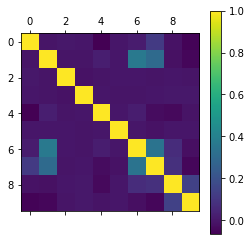

In [11]:
plt.matshow(data_in[["et_cluster", "et_seed", "seed_eta", "seed_phi", "cluster_deta", "cluster_dphi", "seed_nxtals","cl_nxtals", "seed_swissCross", "cl_swissCross"]].corr(), cmap="viridis")
plt.colorbar()

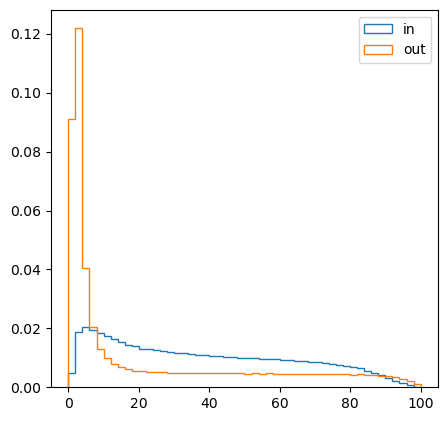

In [12]:
plt.subplots(figsize=(5,5), dpi=100)
plt.hist(data_in.et_seed, histtype="step", density=True, bins=50, label="in", range=[0,100])
plt.hist(data_out.et_seed, histtype="step", density=True, bins=50, label="out", range=[0,100])
plt.legend()

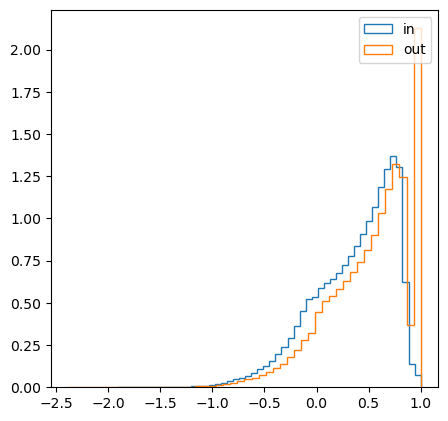

In [13]:
plt.subplots(figsize=(5,5), dpi=100)
plt.hist(data_in.seed_swissCross, histtype="step", density=True, bins=50, label="in", )
plt.hist(data_out.seed_swissCross, histtype="step", density=True, bins=50, label="out")
plt.legend()

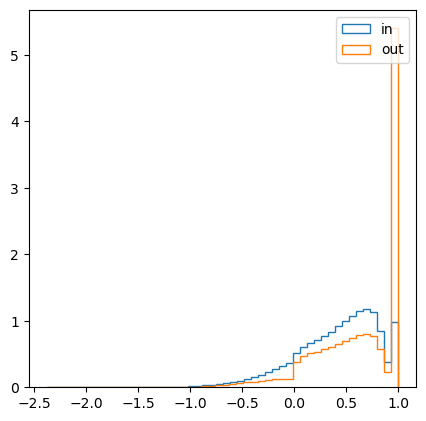

In [14]:
plt.subplots(figsize=(5,5), dpi=100)
plt.hist(data_in.cl_swissCross, histtype="step", density=True, bins=50, label="in", )
plt.hist(data_out.cl_swissCross, histtype="step", density=True, bins=50, label="out")
plt.legend()

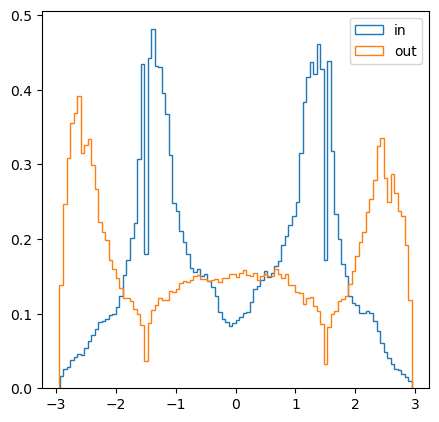

In [15]:
plt.subplots(figsize=(5,5), dpi=100)
plt.hist(data_in.seed_eta, histtype="step", density=True, bins=100, label="in")
plt.hist(data_out.seed_eta, histtype="step", density=True, bins=100, label="out")
plt.legend()

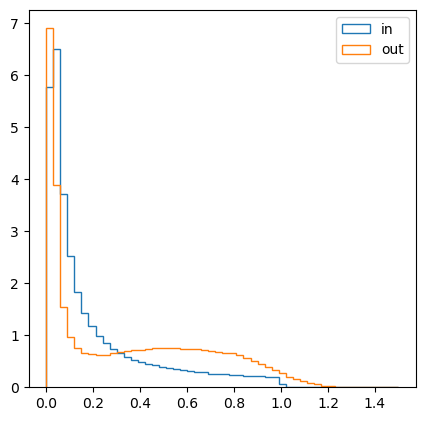

In [16]:
plt.subplots(figsize=(5,5), dpi=100)
plt.hist(data_in.et_cluster/data_in.et_seed, histtype="step", density=True, bins=50, label="in", range=(0,1.5))
plt.hist(data_out.et_cluster/data_out.et_seed, histtype="step", density=True, bins=50, label="out",range=(0,1.5))
plt.legend()

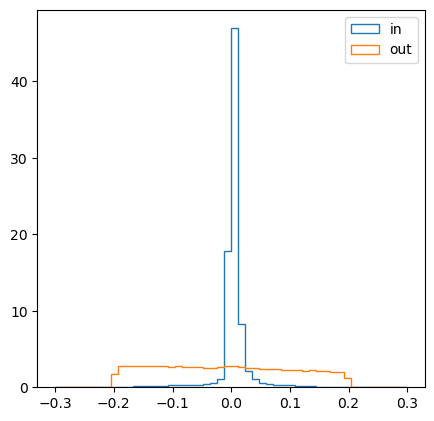

In [17]:
plt.subplots(figsize=(5,5), dpi=100)
plt.hist(data_in.cluster_deta, histtype="step", density=True, bins=50, label="in", range=(-0.3,0.3))
plt.hist(data_out.cluster_deta, histtype="step", density=True, bins=50, label="out",range=(-0.3,0.3))
plt.legend()

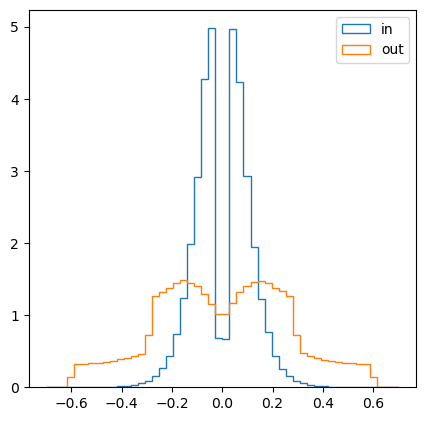

In [18]:
plt.subplots(figsize=(5,5), dpi=100)
plt.hist(data_in.cluster_dphi, histtype="step", density=True, bins=50, label="in", range=(-0.7,0.7))
plt.hist(data_out.cluster_dphi, histtype="step", density=True, bins=50, label="out",range=(-0.7,0.7))
plt.legend()

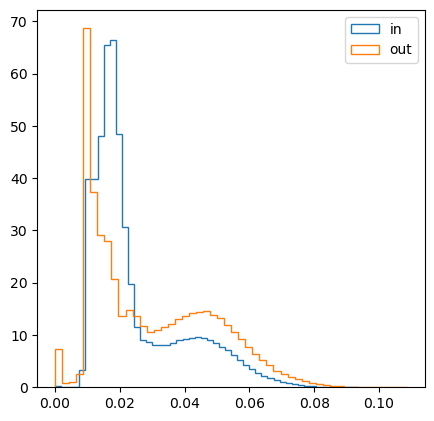

In [19]:
plt.subplots(figsize=(5,5), dpi=100)
plt.hist(data_in.seed_f5_sigmaIphiIphi, histtype="step", density=True, bins=50, label="in", )
plt.hist(data_out.seed_f5_sigmaIphiIphi, histtype="step", density=True, bins=50, label="out")
plt.legend()

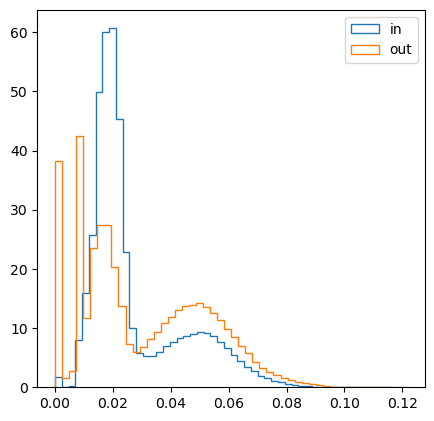

In [20]:
plt.subplots(figsize=(5,5), dpi=100)
plt.hist(data_in.cl_f5_sigmaIphiIphi, histtype="step", density=True, bins=50, label="in", )
plt.hist(data_out.cl_f5_sigmaIphiIphi, histtype="step", density=True, bins=50, label="out")
plt.legend()

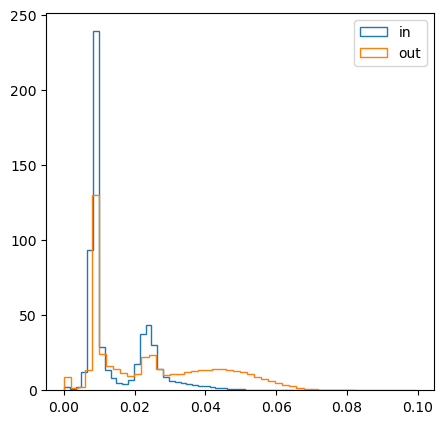

In [21]:
plt.subplots(figsize=(5,5), dpi=100)
plt.hist(data_in.seed_f5_sigmaIetaIeta, histtype="step", density=True, bins=50, label="in", )
plt.hist(data_out.seed_f5_sigmaIetaIeta, histtype="step", density=True, bins=50, label="out")
plt.legend()

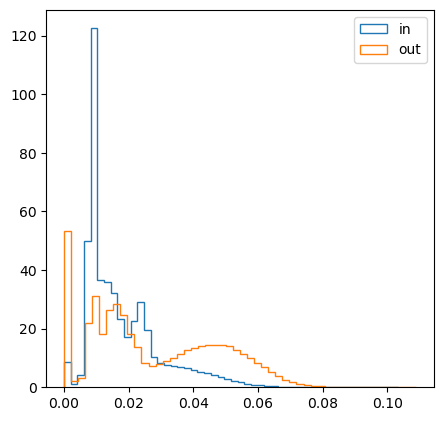

In [22]:
plt.subplots(figsize=(5,5), dpi=100)
plt.hist(data_in.cl_f5_sigmaIetaIeta, histtype="step", density=True, bins=50, label="in", )
plt.hist(data_out.cl_f5_sigmaIetaIeta, histtype="step", density=True, bins=50, label="out")
plt.legend()

## Weights by DeltaPhi

In [8]:
data.columns

Index(['cl_f5_r9', 'cl_f5_sigmaIetaIeta', 'cl_f5_sigmaIetaIphi',
       'cl_f5_sigmaIphiIphi', 'cl_nxtals', 'cl_swissCross', 'cluster_deta',
       'cluster_dphi', 'cluster_iz', 'en_cluster', 'en_seed', 'en_true',
       'et_cluster', 'et_seed', 'et_true', 'in_scluster', 'index',
       'is_calo_matched', 'is_seed', 'max_dr_cluster', 'max_en_cluster',
       'nclusters', 'seed_eta', 'seed_f5_r9d', 'seed_f5_sigmaIetaIeta',
       'seed_f5_sigmaIetaIphi', 'seed_f5_sigmaIphiIphi', 'seed_iz',
       'seed_nxtals', 'seed_phi', 'seed_swissCross', 'window_index',
       'particle'],
      dtype='object')

In [49]:
cols = ["seed_eta", "seed_phi", "seed_iz","en_seed","et_seed",
        "cluster_deta", "cluster_dphi", "en_cluster", "et_cluster",
       "seed_f5_r9", "seed_f5_sigmaIetaIeta","seed_f5_sigmaIetaIphi","seed_f5_sigmaIphiIphi","seed_swissCross","seed_nxtals",
        "cl_f5_r9", "cl_f5_sigmaIetaIeta","cl_f5_sigmaIetaIphi","cl_f5_sigmaIphiIphi","cl_swissCross", "cl_nxtals"]

In [63]:
data = data_EE

In [64]:
X = data[ cols ].values
truth = data[["in_scluster"]].values
y = np.array(truth[:], dtype=int)

In [65]:
w = len(data[(data.is_seed == False) & (data.in_scluster == False)]) / len(data[(data.is_seed == False) & (data.in_scluster==True)])
print(w)

2.9467380330577133


In [66]:
data["w"] = data.in_scluster.apply(lambda a: w if a else 1.)
weight = data.w.values

/usr/local/bin/start_ipykernel.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [54]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pickle.dump(scaler, open("../models/v5_dynamicwindow/scaler_model1_EB.pkl", "wb"))

In [67]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pickle.dump(scaler, open("../models/v5_dynamicwindow/scaler_model1_EE.pkl", "wb"))

In [68]:
scaler.mean_

array([-9.48937722e-02, -2.59092069e-02, -3.23802034e-02,  8.54387012e+01,
        1.95493967e+01, -7.99008024e-03,  1.68780274e-05,  8.92748605e+00,
        1.92283524e+00,  1.08804190e+00,  3.39450646e-02,  1.85485538e-05,
        4.13554904e-02,  4.96716655e-01,  5.44590774e+00,  4.09401210e+00,
        3.71462585e-02,  4.80538918e-05,  4.39461957e-02,  5.70297494e-01,
        3.15806715e+00])

In [69]:
scaler.scale_

array([2.27502784e+00, 1.80358311e+00, 9.99475624e-01, 1.25874656e+02,
       2.62122915e+01, 1.01794340e-01, 1.81101293e-01, 6.05398279e+00,
       1.77231292e+00, 5.03589571e-01, 1.40048073e-02, 4.14562658e-04,
       1.53689902e-02, 4.13270103e-01, 5.68762983e+00, 9.93354108e+00,
       1.65018741e-02, 5.45041026e-04, 1.80243836e-02, 4.37347302e-01,
       4.28826919e+00])

In [70]:
X_train, X_val, y_train, y_val, w_train, w_val = train_test_split(X_scaled, y, weight, test_size=0.20)

# Training

In [71]:
# Import all the required Libraries
import tensorflow
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Model, Sequential
from keras.layers import Dense, Conv2D, Dropout, BatchNormalization, Input, Reshape, Flatten, Deconvolution2D, Conv2DTranspose, MaxPooling2D, UpSampling2D, Lambda
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import adam
from keras import callbacks
from keras import backend as K
from keras import regularizers
from keras.callbacks import *

In [82]:
model = Sequential()
model.add(Dense(100, input_dim=X_val.shape[1], activation="relu",kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.05))
model.add(Dense(50, activation="relu",kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.05))
model.add(Dense(50, activation="relu"))
model.add(Dropout(0.05))
model.add(Dense(50, activation="relu"))
model.add(Dropout(0.05))
model.add(Dense(1, activation="sigmoid"))

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 100)               2200      
_________________________________________________________________
dropout_23 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_30 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_24 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 50)                2550      
_________________________________________________________________
dropout_25 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_32 (Dense)             (None, 50)                2550      
__________

In [81]:
import math
def step_decay(epoch):
    initial_lrate = 0.3
    drop = 0.65
    epochs_drop = 5.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    if lrate < 0.005: return 0.005
    return lrate

In [83]:
auto_save = ModelCheckpoint("../models/v5_dynamicwindow/model2_EE.hd5", monitor='val_loss', 
                    verbose=1, save_best_only=True, save_weights_only=False, 
                    mode='auto', period=5)

early_stop = EarlyStopping(monitor='val_loss', min_delta=0.0001, 
                            patience=15, verbose=1)


lr_scheduler = callbacks.LearningRateScheduler(step_decay, verbose=1)

history = model.fit(
            X_train, y_train,
            sample_weight = w_train,
            batch_size = 2048,
            epochs=300,
            validation_data = (X_val, y_val, w_val),
            callbacks = [early_stop, auto_save, lr_scheduler]
            )

Train on 756832 samples, validate on 189209 samples
Epoch 1/300

Epoch 00001: LearningRateScheduler setting learning rate to 0.3.
756832/756832 [==============================] - 5s 7us/step - loss: 0.6060 - acc: 0.9158 - val_loss: 0.3273 - val_acc: 0.9514
Epoch 2/300

Epoch 00002: LearningRateScheduler setting learning rate to 0.3.
756832/756832 [==============================] - 4s 6us/step - loss: 0.3460 - acc: 0.9312 - val_loss: 0.3585 - val_acc: 0.8981
Epoch 3/300

Epoch 00003: LearningRateScheduler setting learning rate to 0.3.
756832/756832 [==============================] - 4s 6us/step - loss: 0.3408 - acc: 0.9303 - val_loss: 0.3812 - val_acc: 0.8820
Epoch 4/300

Epoch 00004: LearningRateScheduler setting learning rate to 0.3.
756832/756832 [==============================] - 4s 5us/step - loss: 0.3369 - acc: 0.9305 - val_loss: 0.3166 - val_acc: 0.9522
Epoch 5/300

Epoch 00005: LearningRateScheduler setting learning rate to 0.195.
756832/756832 [==============================] -

756832/756832 [==============================] - 4s 6us/step - loss: 0.2205 - acc: 0.9521 - val_loss: 0.2119 - val_acc: 0.9518
Epoch 37/300

Epoch 00037: LearningRateScheduler setting learning rate to 0.014706683671875003.
756832/756832 [==============================] - 4s 6us/step - loss: 0.2215 - acc: 0.9517 - val_loss: 0.2111 - val_acc: 0.9509
Epoch 38/300

Epoch 00038: LearningRateScheduler setting learning rate to 0.014706683671875003.
756832/756832 [==============================] - 4s 6us/step - loss: 0.2219 - acc: 0.9514 - val_loss: 0.2206 - val_acc: 0.9432
Epoch 39/300

Epoch 00039: LearningRateScheduler setting learning rate to 0.014706683671875003.
756832/756832 [==============================] - 4s 6us/step - loss: 0.2223 - acc: 0.9513 - val_loss: 0.2161 - val_acc: 0.9457
Epoch 40/300

Epoch 00040: LearningRateScheduler setting learning rate to 0.009559344386718753.
756832/756832 [==============================] - 4s 6us/step - loss: 0.2161 - acc: 0.9529 - val_loss: 0.2093

756832/756832 [==============================] - 4s 6us/step - loss: 0.2103 - acc: 0.9531 - val_loss: 0.2085 - val_acc: 0.9461
Epoch 72/300

Epoch 00072: LearningRateScheduler setting learning rate to 0.005.
756832/756832 [==============================] - 4s 6us/step - loss: 0.2101 - acc: 0.9532 - val_loss: 0.2038 - val_acc: 0.9564
Epoch 73/300

Epoch 00073: LearningRateScheduler setting learning rate to 0.005.
756832/756832 [==============================] - 4s 6us/step - loss: 0.2097 - acc: 0.9531 - val_loss: 0.2040 - val_acc: 0.9567
Epoch 74/300

Epoch 00074: LearningRateScheduler setting learning rate to 0.005.
756832/756832 [==============================] - 4s 6us/step - loss: 0.2097 - acc: 0.9531 - val_loss: 0.2036 - val_acc: 0.9561
Epoch 75/300

Epoch 00075: LearningRateScheduler setting learning rate to 0.005.
756832/756832 [==============================] - 4s 5us/step - loss: 0.2098 - acc: 0.9532 - val_loss: 0.2029 - val_acc: 0.9549

Epoch 00075: val_loss improved from 0.20

756832/756832 [==============================] - 4s 6us/step - loss: 0.2066 - acc: 0.9536 - val_loss: 0.2073 - val_acc: 0.9449
Epoch 145/300

Epoch 00145: LearningRateScheduler setting learning rate to 0.005.
756832/756832 [==============================] - 4s 5us/step - loss: 0.2067 - acc: 0.9536 - val_loss: 0.2032 - val_acc: 0.9599

Epoch 00145: val_loss did not improve from 0.19988
Epoch 146/300

Epoch 00146: LearningRateScheduler setting learning rate to 0.005.
756832/756832 [==============================] - 4s 5us/step - loss: 0.2070 - acc: 0.9535 - val_loss: 0.1989 - val_acc: 0.9536
Epoch 147/300

Epoch 00147: LearningRateScheduler setting learning rate to 0.005.
756832/756832 [==============================] - 4s 5us/step - loss: 0.2067 - acc: 0.9534 - val_loss: 0.2001 - val_acc: 0.9581
Epoch 148/300

Epoch 00148: LearningRateScheduler setting learning rate to 0.005.
756832/756832 [==============================] - 4s 5us/step - loss: 0.2063 - acc: 0.9537 - val_loss: 0.1991 - v

>>> Computing AUC...
AUC score: 0.9905887952285245
>>> Saving ROC curve...


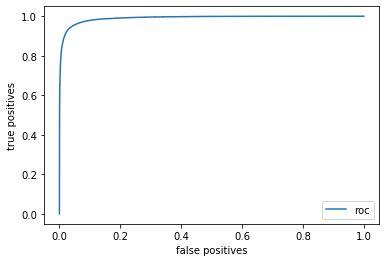

In [84]:
# Evalutation
print(">>> Computing AUC...")

from sklearn.metrics import roc_auc_score, roc_curve

pred = model.predict(X_val,batch_size=2048)
auc = roc_auc_score(y_val, pred)
print("AUC score: " + str(auc))

print(">>> Saving ROC curve...")
fp , tp, th = roc_curve(y_val, pred)
plt.plot(fp, tp, label="roc")
#plt.plot(fp, th, label="threshold")
plt.xlabel("false positives")
plt.ylabel("true positives")
plt.ylim(-0.05,1.05)
plt.legend()

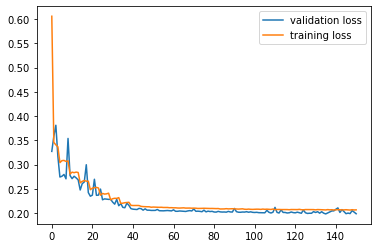

In [85]:
plt.plot(history.epoch, history.history["val_loss"], label="validation loss")
plt.plot(history.epoch, history.history["loss"], label="training loss")
plt.legend()

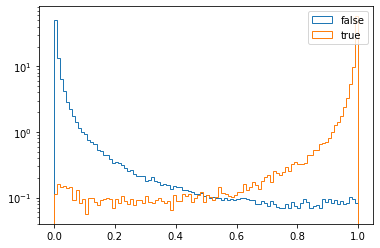

In [86]:
results = model.predict(X_val)
plt.hist(results[y_val==0], bins=100,density=True, label="false", histtype="step")
plt.hist(results[y_val==1], bins=100, density=True, label="true", histtype="step")
plt.yscale("log")
plt.legend()

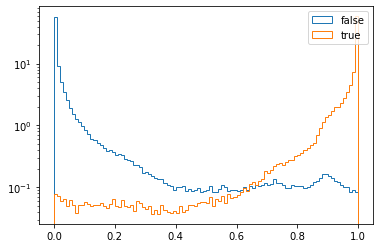

In [45]:
results = model.predict(X_val)
plt.hist(results[y_val==0], bins=100,density=True, label="false", histtype="step")
plt.hist(results[y_val==1], bins=100, density=True, label="true", histtype="step")
plt.yscale("log")
plt.legend()

# Some plots

In [1]:
from keras.models import load_model
model = load_model("models/model11_balanced_100_80_50.hd5")
scaler = pickle.load(open("models/scaler_gamma_electrons.pkl", "rb"))

Using TensorFlow backend.


OSError: Unable to open file (unable to open file: name = 'models/model11_balanced_100_80_50.hd5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [27]:
fp , tp, th = roc_curve(y_test, pred)
fig, ax1 = plt.subplots(figsize=(7,6), dpi=100)
ax1.plot(fp, tp, label="roc", color="blue")

ax1.set_xlabel("Bkg contamination", fontsize=18)
ax1.set_ylabel("Signal efficiency", fontsize=18, color="blue")
ax1.set_ylim(0.850, 1.01)
ax1.set_xlim(0, 0.06)
#ax1.plot([0,1],[1,1],"b--")
ax1.tick_params("y",labelsize="large", labelcolor="blue")

ax2 = ax1.twinx()
ax2.plot(fp, th, label="threshold", color="red")
ax2.tick_params(axis='y', labelcolor="red", labelsize="large")
ax2.set_ylabel("Threshold", fontsize=18, color="red")
ax2.set_ylim(0, 1)
ax1.grid()
#ax2.grid(linestyle="dashed", color="red")

ax2.plot([0.01, 0.01], [0, 2], "g--")
ax2.set_yticks(np.arange(0, 1.1, 0.1))
#ax2.minorticks_on()

ax1.set_title("ROC curve", fontsize=20)
ax2.text(x = 0.048, y = 1.01, s="AUC=0.997", fontsize="large")

fig.tight_layout()

NameError: name 'y_test' is not defined

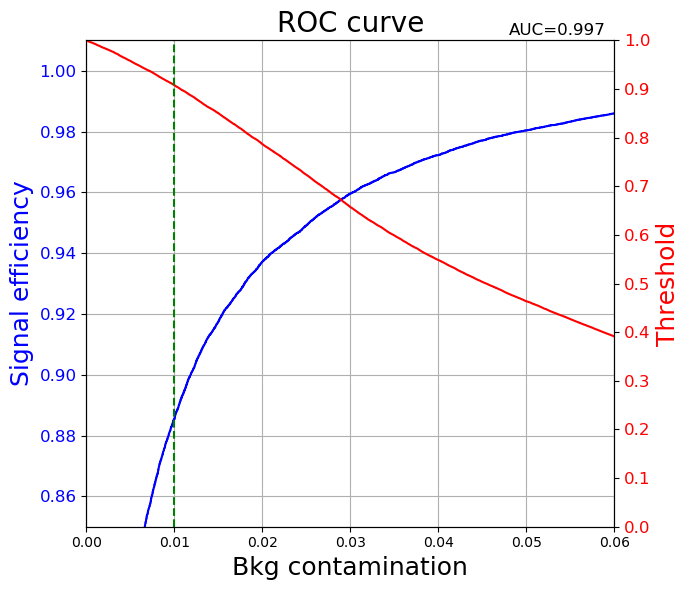

In [36]:
fp , tp, th = roc_curve(y_test, pred)
fig, ax1 = plt.subplots(figsize=(7,6), dpi=100)
ax1.plot(fp, tp, label="roc", color="blue")

ax1.set_xlabel("Bkg contamination", fontsize=18)
ax1.set_ylabel("Signal efficiency", fontsize=18, color="blue")
ax1.set_ylim(0.850, 1.01)
ax1.set_xlim(0, 0.06)
#ax1.plot([0,1],[1,1],"b--")
ax1.tick_params("y",labelsize="large", labelcolor="blue")

ax2 = ax1.twinx()
ax2.plot(fp, th, label="threshold", color="red")
ax2.tick_params(axis='y', labelcolor="red", labelsize="large")
ax2.set_ylabel("Threshold", fontsize=18, color="red")
ax2.set_ylim(0, 1)
ax1.grid()
#ax2.grid(linestyle="dashed", color="red")

ax2.plot([0.01, 0.01], [0, 2], "g--")
ax2.set_yticks(np.arange(0, 1.1, 0.1))
#ax2.minorticks_on()

ax1.set_title("ROC curve", fontsize=20)
ax2.text(x = 0.048, y = 1.01, s="AUC=0.997", fontsize="large")

fig.tight_layout()